In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import clear_output
import pandas as pd
import time
import sklearn.metrics
import seaborn as sns
import random
from sklearn.utils import shuffle

%matplotlib inline

In [30]:
def stochastic_gd(x_data, y_data, theta_0, theta_1, learning_rate, epoch):
    #theta_0,theta_1 are been assumed by 0
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    gradient_vector=[]
    cost_function = []
    m= len(x_data) # number of observations
    
    for n in range(epoch):
        if len(cost_function) > 2:
            if np.absolute(cost_function[-2] - cost_function[-1]) < 0.001:
                    return error, theta_00, theta_11
        for i in range(m):
            
            h = theta_1*x_data[i]+theta_0 # hypothesis fuction
            j= (1/2)*((h-y_data[i])**2) #calculating the cost fuction for single observation
            plt.scatter(x_data, y_data) #ploting the data
            
            clear_output(wait=True)
            plt.plot([0,15],[(theta_1*0 + theta_0), (theta_1*15 + theta_0)]) #ploting a line
            
            
            print("intercept= "+str(theta_0),"slope= "+str(theta_1),"cost function= "+str(j),sep="\n")
            print("iter no.= "+ str(i))
            print("epoch no.= "+ str(n))
            
            plt.xlabel("x_data")
            plt.ylabel("y_data")
            plt.title("plotting a line with different parameters (theta_0,theta_1)")
            
            
            plt.show()
            time.sleep(0.25)
            
            #Update the parameters (simultaneously)
            theta_0 = theta_0-(learning_rate*(h-y_data[i]))
            theta_1 = theta_1-(learning_rate*(h-y_data[i])*x_data[i])
            
            error.append(j)
            theta_00.append(theta_0)
            theta_11.append(theta_1)
            gradient_vector.append([theta_0, theta_1])
            
        cost_function.append(j)
        

    return error, theta_00, theta_11

intercept= -0.03363227013096928
slope= -1.9547868960549177
cost function= 0.024562550831435433
iter no.= 49
epoch no.= 1


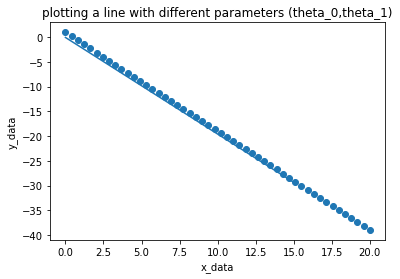

In [31]:
a = -2
b = 1

x=np.linspace(0,20)
y=a*x + b

x, y = shuffle(x, y, random_state=0)

theta_0=0
theta_1=0

learning_rate=0.005
epoch = 2

error, theta_00, theta_11=stochastic_gd(x, y, theta_0, theta_1, learning_rate, epoch)

Text(0, 0.5, 'cost_function(j)')

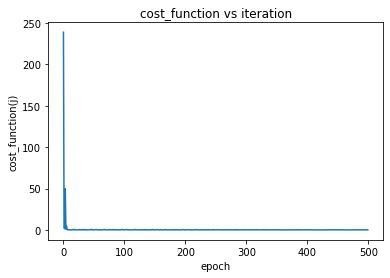

In [139]:
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)")

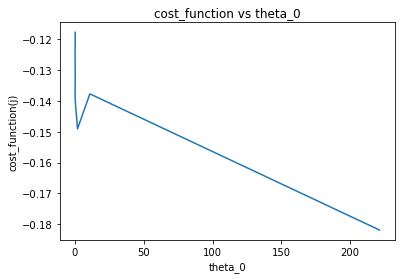

In [13]:
plt.plot(error, theta_00)
plt.title("cost_function vs theta_0")
plt.ylabel("cost_function(j)")
plt.xlabel("theta_0");

Text(0.5, 0, 'theta_1')

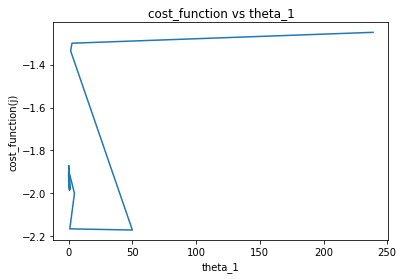

In [17]:
plt.plot(error, theta_11)
plt.title("cost_function vs theta_1")
plt.ylabel("cost_function(j)")
plt.xlabel("theta_1")

In [11]:
def miniBatch_gd(x_data, y_data, theta_0, theta_1, learning_rate, miniBatch, epoch):
    
    error=[]    #list of cost function for every iteration
    theta_00=[]  #list of theta_0 function for every iteration
    theta_11=[]  #list of theta_1 function for every iteration
    gradient_vector= []
    cost_function = []
    
    m = int(len(x_data) / miniBatch) # number of datapoints per batch
    
    for k in range(epoch):
        n=m
        if len(cost_function) > 2:
            if np.absolute(cost_function[-2] - cost_function[-1]) < 0.01:
                    return error, theta_00, theta_11, cost_function
                
        for i in range(miniBatch):   
            h = theta_1*x_data[(n-m):n]+theta_0 # hypothesis fuction
            
            e = h-y_data[(n-m):n] #error
            j= 1/(2*m)*np.dot(e, e) #calculating the cost fuction 
            
            plt.scatter(x_data, y_data) #ploting the data
            clear_output(wait=True)
                         
            plt.plot([0,15],[(theta_1*0 + theta_0), (theta_1*15 + theta_0)])
            r2_score = sklearn.metrics.r2_score(y_data[(n-m):n],h)
            
            print("intercept= "+str(theta_0),"slope= "+str(theta_1),"cost function= "+str(j),sep="\n")
            print("r2_score= "+ str(r2_score))
            print("iter no.= "+ str(i))
            print("epoch no.= "+ str(k))
            
            plt.xlabel("x_data")
            plt.ylabel("y_data")
            plt.title("plotting a line with different parameters (theta_0,theta_1)")
            
            plt.show()
            time.sleep(0.25)
            
            theta_0 = theta_0-(learning_rate*(1/m)*np.sum(e))
            theta_1 = theta_1-(learning_rate*(1/m)*np.dot(e,x_data[(n-m):n]))
            n += m 

            error.append(j)
            theta_00.append(theta_0)
            theta_11.append(theta_1)
            gradient_vector.append([theta_0, theta_1])
            
        cost_function.append(j)
    return error, theta_00, theta_11, cost_function

intercept= -0.12182029289748707
slope= -1.920001561287936
cost function= 0.19670526127579294
r2_score= 0.9972444303323014
iter no.= 3
epoch no.= 2


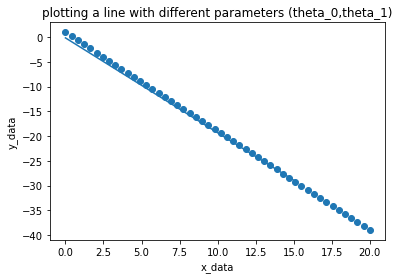

In [12]:
a = -2
b = 1

x=np.linspace(0,20)
y=a*x + b

x, y = shuffle(x, y, random_state=0)

theta_0=0
theta_1=0
learning_rate=0.01
epoch=10
miniBatch=4

error, theta_00, theta_11, q=miniBatch_gd(x, y, theta_0, theta_1, learning_rate, miniBatch, epoch)

Text(0, 0.5, 'cost_function(j)')

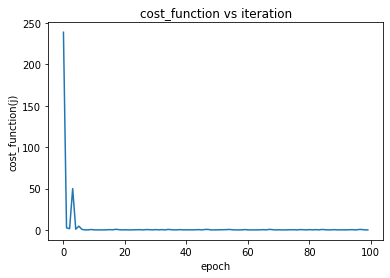

In [25]:
plt.plot(error)
plt.title("cost_function vs iteration")
plt.xlabel("epoch")
plt.ylabel("cost_function(j)")

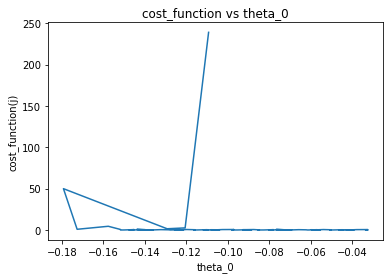

In [19]:
plt.plot(theta_00, error)
plt.title("cost_function vs theta_0")
plt.ylabel("cost_function(j)")
plt.xlabel("theta_0");

Text(0.5, 0, 'theta_1')

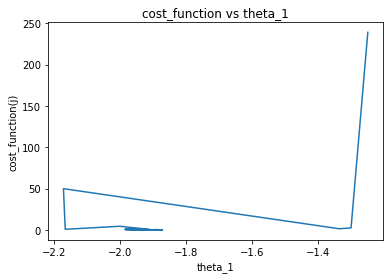

In [22]:
plt.plot(theta_11, error)
plt.title("cost_function vs theta_1")
plt.ylabel("cost_function(j)")
plt.xlabel("theta_1")